<a href="https://colab.research.google.com/github/Raijin-ZD/MachineLearning/blob/main/Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Train.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Test.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
dtypes: int64(3), object(5)
memory usage: 508.1+ KB


In [ ]:
train_data['owner'].value_counts()


First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
train_data['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [ ]:
train_data['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [ ]:
train_data['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [ ]:
test_data['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

All the columns above are Categorical just making sure

In [ ]:
train_data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [ ]:
train_data.info()
print(len(train_data)) #prints rows
print(len(train_data.columns))#prints cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
dtypes: int64(3), object(5)
memory usage: 508.1+ KB
8128
8


No nulls

In [ ]:
label_encoders = {}
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col])

# Extract features and target variable
X = train_data.drop(['selling_price', 'name'], axis=1)  # Dropping 'name' column as it's a string and not useful for regression XD
y = train_data['selling_price']

In [ ]:
test_data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
test_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# Data preprocessing for test data (similar to training data preprocessing)
label_encoders = {}
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  test_data[col] = label_encoders[col].fit_transform(test_data[col])

# Extract features and target variable from test data
X_test = test_data.drop(['selling_price', 'name'], axis=1)
y_test = test_data['selling_price']

In [ ]:
train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0


Multi-Feature Equation

In [ ]:
multi_feature_model = LinearRegression()
multi_feature_model.fit(X, y)



LinearRegression()

In [ ]:
# Predict using the trained model
predictions_multi_feature = multi_feature_model.predict(X)
print(predictions_multi_feature)

[ 542439.24354894  549146.3946958  -169885.56025253 ...  335326.43161711
  601293.25722225  601293.25722225]


In [ ]:

# Calculate RMSE, MSE, and MAE for Multi-Feature Equation approach
rmse_multi_feature = np.sqrt(mean_squared_error(y, predictions_multi_feature))
mse_multi_feature = mean_squared_error(y, predictions_multi_feature)
mae_multi_feature = mean_absolute_error(y, predictions_multi_feature)

# Print or store the RMSE, MSE, and MAE values for Multi-Feature Equation approach
print("RMSE ", rmse_multi_feature)
print("MSE ", mse_multi_feature)
print("MAE ", mae_multi_feature)


RMSE  574679.6007326043
MSE  330256643498.1854
MAE  315218.55534885294
0.4918851636752938


In [ ]:
predictions_multi_feature_test = multi_feature_model.predict(X_test)

rmse_multi_feature_test = np.sqrt(mean_squared_error(y_test, predictions_multi_feature_test))
mse_multi_feature_test = mean_squared_error(y_test, predictions_multi_feature_test)
mae_multi_feature_test = mean_absolute_error(y_test, predictions_multi_feature_test)


# Print or store the RMSE, MSE, and MAE values for Linear Regression on test data
print("RMSE (Multi-Feature Equation Approach - Test Data):", rmse_multi_feature_test)
print("MSE (Multi-Feature Equation Approach - Test Data):", mse_multi_feature_test)
print("MAE (Multi-Feature Equation Approach - Test Data):", mae_multi_feature_test)


RMSE (Multi-Feature Equation Approach - Test Data): 480853.718888173
MSE (Multi-Feature Equation Approach - Test Data): 231220298968.58612
MAE (Multi-Feature Equation Approach - Test Data): 321862.4694682038


In [ ]:
X_train = train_data.drop(['selling_price', 'name'], axis=1)
y_train = train_data['selling_price']

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

sgd_regressor = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42)

sgd_regressor.fit(X_train_standardized, y_train)

X_test = test_data.drop(['selling_price', 'name'], axis=1)
X_test_standardized = scaler.transform(X_test)

predictions_gradient_descent_test = sgd_regressor.predict(X_test_standardized)

rmse_gradient_descent_test = np.sqrt(mean_squared_error(y_test, predictions_gradient_descent_test))
mse_multi_feature_test = mean_squared_error(y_test, predictions_gradient_descent_test)
mae_multi_feature_test = mean_absolute_error(y_test, predictions_gradient_descent_test)
print("RMSE", rmse_gradient_descent_test)
print("MSE", mse_multi_feature_test)
print("MAE", mae_multi_feature_test)


RMSE 480874.2022538984
MSE 231239998393.32315
MAE 318095.5752851069


In [ ]:
rmse_values = []
for degree in range(1, 11):
    # Create polynomial features for the current degree
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Initialize and train the polynomial regression model
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)

    # Predict using the trained polynomial regression model
    X_test1 = poly_features.fit_transform(X_test)
    predictions_poly = poly_regressor.predict(X_test1)

    # Calculate RMSE for the current degree
    rmse = np.sqrt(mean_squared_error(y_test, predictions_poly))

    # Append RMSE value to the list
    rmse_values.append(rmse)

    # Print or store RMSE for the current degree
    print(f"RMSE (Degree {degree}): {rmse}")

# rmse_values now contains the RMSE values for degrees ranging from 1 to 10

RMSE (Degree 1): 480853.7188881295
RMSE (Degree 2): 537671.1590012201
RMSE (Degree 3): 503742.1816322721
RMSE (Degree 4): 4215716.643202109
RMSE (Degree 5): 395515955.8807315
RMSE (Degree 6): 48080731.42425087
RMSE (Degree 7): 77598208.64602937
RMSE (Degree 8): 146895365.8282851
RMSE (Degree 9): 1211726003.3223028
RMSE (Degree 10): 395242064.6562734


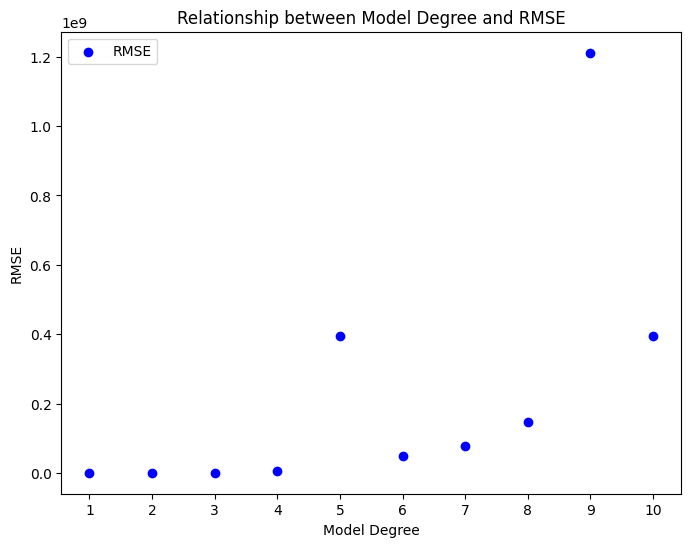

In [ ]:

# Plotting the relationship between model degree and RMSE
plt.figure(figsize=(8, 6))
plt.scatter(range(1, 11), rmse_values, color='blue', label='RMSE')
plt.xlabel('Model Degree')
plt.ylabel('RMSE')
plt.title('Relationship between Model Degree and RMSE')
plt.xticks(range(1, 11))
plt.legend()
plt.show()
